* The **cardiovascular disease** data comes from [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 

In [1]:
#setting up the project environment by importing necessary libraries. 

#using matplotlib and seaborn for visualization purposes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#pandas library for data structure, manipulation, and analysis. 
import pandas as pd

#NumPy library for mathematical operations and arrays
import numpy as np

#scipy library for scientific/technical computing 
from scipy import stats

#math library for common math functions
import math

In [2]:
#reading csv file and converting to pandas df:
data = pd.read_csv("cardio_train.csv", sep=";")


#setting limit to how dataframe is displayed 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)



#exploring the data
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [3]:
#renaming the columns to specific name
data=data.rename(columns={'ap_hi':'systolic',
                          'ap_lo':'diastolic',
                          'cardio':'cvd_result'})

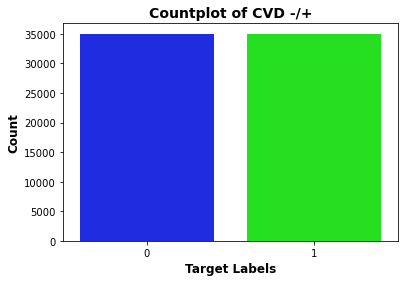

CVD count:
0    35021
1    34979
Name: cvd_result, dtype: int64



In [4]:
#counting cardio variable values 
sns.countplot(data=data, x='cvd_result', palette='hsv_r')
plt.title("Countplot of CVD -/+", fontsize=14, weight='heavy')
plt.ylabel("Count", fontsize=12, weight='heavy')
plt.xlabel("Target Labels", fontsize=12, weight='heavy')
plt.show()

# getting value count of target: 
count=data['cvd_result'].value_counts()
print(f'CVD count:\n{count}')
print()

In [5]:
# for ease of analysis, the values in the age column is in days so dividing age value to 365 to get age in years
data['age']=(data['age']/365).round()


#converting the values in height from cm to inches:
data['height']=(data['height']* 0.393701)
#converting the values in the weight column from kg to lbs:
data['weight']=(data['weight']* 2.20462)

In [6]:
#Checking for min and max values of systolic and diastolic pressures
sys_max= data["systolic"]
sys_max_value = sys_max.max() 
print(f'Max value for Systolic Pressure is: {sys_max_value}')

sys_min= data["systolic"]
sys_min_value = sys_min.min() 
print(f'Min value for Systolic Pressure is: {sys_min_value}')

print()

dias_max= data["diastolic"]
dias_max_value = dias_max.max() 
print(f'Max value for Diastolic Pressure is: {dias_max_value}')

dias_min= data["diastolic"]
dias_min_value = dias_min.min() 
print(f'Min value for Diastolic Pressure is: {dias_min_value}')

Max value for Systolic Pressure is: 16020
Min value for Systolic Pressure is: -150

Max value for Diastolic Pressure is: 11000
Min value for Diastolic Pressure is: -70


**No negative values for blood pressure and BP over 200 is clearly too high. To deal with outliers, using two-way winsorization to cap extreme values.** 

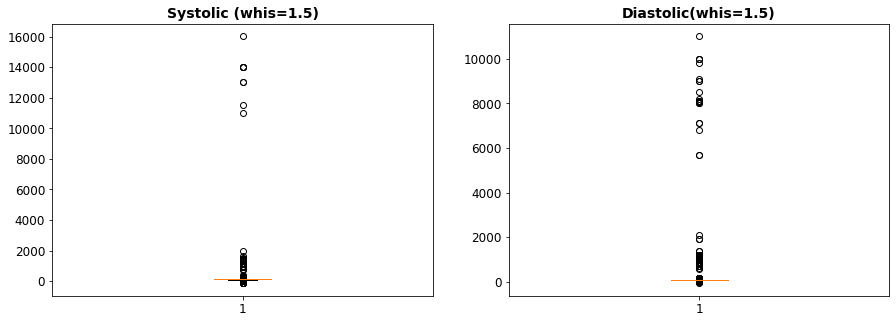

In [7]:
#Using boxplot to display outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Systolic (whis=1.5)", fontsize=14, weight='heavy')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.boxplot(data['systolic'], whis=1.5)

plt.subplot(1,2,2)
plt.title("Diastolic(whis=1.5)", fontsize=14, weight='heavy')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.boxplot(data['diastolic'], whis=1.5)


plt.show()

In [8]:
from scipy.stats.mstats import winsorize

data['systolic']=winsorize(data['systolic'], (0.01, 0.01))

data['diastolic']=winsorize(data['diastolic'], (0.02, 0.02))


In [9]:
#Checking for min and max values of systolic and diastolic pressures
sys_max= data["systolic"]
sys_max_value = sys_max.max() 
print(f'Max value for Systolic Pressure is: {sys_max_value}')

sys_min= data["systolic"]
sys_min_value = sys_min.min() 
print(f'Min value for Systolic Pressure is: {sys_min_value}')

print()

dias_max= data["diastolic"]
dias_max_value = dias_max.max() 
print(f'Max value for Diastolic Pressure is: {dias_max_value}')

dias_min= data["diastolic"]
dias_min_value = dias_min.min() 
print(f'Min value for Diastolic Pressure is: {dias_min_value}')

Max value for Systolic Pressure is: 180
Min value for Systolic Pressure is: 90

Max value for Diastolic Pressure is: 110
Min value for Diastolic Pressure is: 60


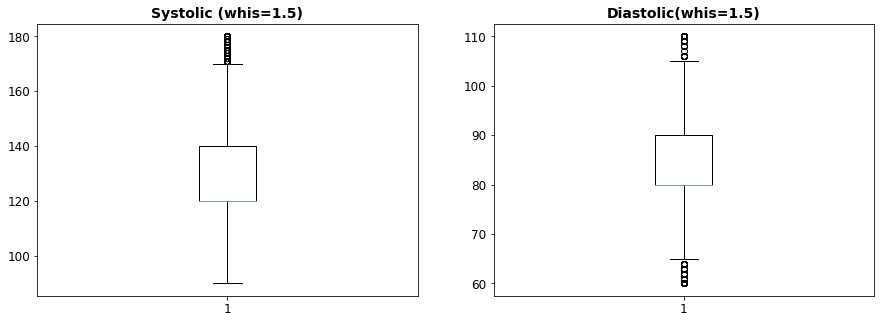

In [10]:
#Using boxplot to display outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Systolic (whis=1.5)", fontsize=14, weight='heavy')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.boxplot(data['systolic'], whis=1.5)

plt.subplot(1,2,2)
plt.title("Diastolic(whis=1.5)", fontsize=14, weight='heavy')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.boxplot(data['diastolic'], whis=1.5)


plt.show()

# Feature Engineering
<h3><font color='blue'>Adding Blood Pressure variable:</font></h3>


<img src='https://www.health.harvard.edu/media/content/images/p1_BPChart_ML0418.jpg' style='width:700px; height:500px'/>

<img src='https://cdn-prod.medicalnewstoday.com/content/images/articles/327/327077/a-blood-pressure-chart-infographic.jpg' style='width:400px; height:500px'/>

In [11]:
# Caculate blood pressure risk 
def blood_pressure_stages(systolic, diastolic):
    
    if (systolic < 90) and (diastolic<60):
        bp_stages='low'
    
    #systolic is less than 120
    #and 
    #diastolic is less than 80 
    elif (systolic < 120)  and (diastolic < 80):
        bp_stages = 'Normal'
        
    #systolic 120 - 129 
    #and 
    #diastolic less than 80
    elif (systolic == 120 or systolic < 129) and (diastolic < 80):
        bp_stages = 'Elevated'
        
        
    #systolic 130 - 139
    # or
    #diastolic 80 - 89 
    elif (systolic == 130 or systolic < 139)  or (diastolic == 80 and diastolic <= 89):
        bp_stages = 'Hypertension Stage 1'
        
        
    
    #systolic 140 or higher 
    #or
    #diastolic 90 or higher 
    elif (systolic == 140 or systolic < 179)  or (diastolic == 90 or diastolic < 119):
        bp_stages = 'Hypertension Stage 2'
        
    
    #systolic higher than 180 
    # and/or
    #diastolic higher than 120 
    elif (systolic > 180) or (diastolic > 120):
        bp_stages = 'Hypertensive Crisis'
        
        
    else:
        bp_stages = 'Invalid Values'
        
        
    return bp_stages
        
#blood_pressure_stages(148,88)

In [12]:
#creating a new column called bp_stage which incorporates the defined function,
# blood_pressure_stages, and uses the systolic and diastolic columns as an argument 
data['bp_stage'] = data[['systolic','diastolic']].apply(lambda x: blood_pressure_stages(*x), axis=1)

#display data to check if new column called "bp_stage" was successfully incorporated to data
data.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cvd_result,bp_stage
0,0,50.0,2,66.141768,136.68644,110,80,1,1,0,0,1,0,Hypertension Stage 1
1,1,55.0,1,61.417356,187.39270,140,90,3,1,0,0,1,1,Hypertension Stage 2
2,2,52.0,1,64.960665,141.09568,130,70,3,1,0,0,0,1,Hypertension Stage 1
3,3,48.0,2,66.535469,180.77884,150,100,1,1,0,0,1,1,Hypertension Stage 2
4,4,48.0,1,61.417356,123.45872,100,60,1,1,0,0,0,0,Normal


In [13]:
#extracting result 0 from column cvd_result, which I assign negative_cvd
negative_cvd=data[data['cvd_result']==0]

#extracting result 1 from column cvd_result, which I assign positive_cvd
positive_cvd=data[data['cvd_result']==1]

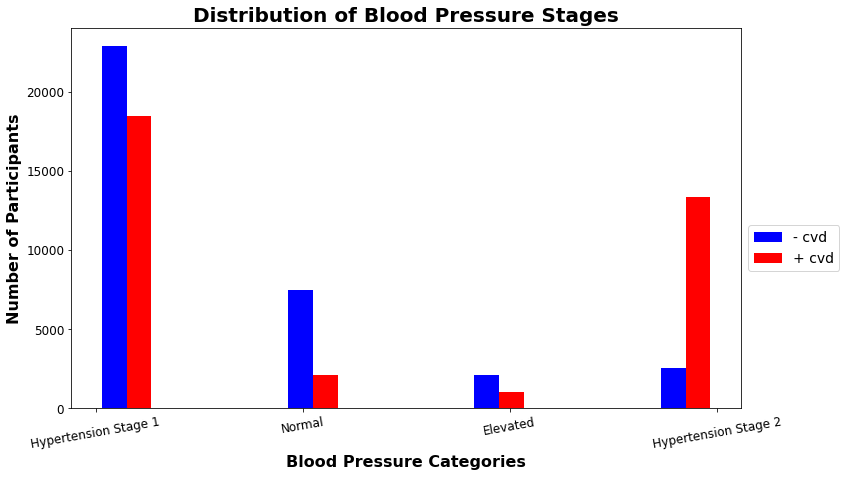

bp_stage,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
cvd_result,,,,
0,2112,22903,2530,7476
1,1011,18458,13378,2132


In [14]:
plt.figure(figsize=(12,7))


neg_cvd=negative_cvd['bp_stage']
pos_cvd=positive_cvd['bp_stage']


#plotting histogram and naming legend label and color for each samples
plt.hist([neg_cvd, pos_cvd], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.gca().legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=14)


#creating title 
plt.title('Distribution of Blood Pressure Stages', 
          weight='bold', fontsize=20)


#formatting x and y labels 
plt.xlabel('Blood Pressure Categories', weight='bold', fontsize=16)
plt.ylabel('Number of Participants', weight='bold', fontsize=16)


# format the x and y ticks
plt.xticks(rotation=10, horizontalalignment='center', 
           weight='normal', fontsize=12)

plt.yticks(weight='normal', fontsize=12)


plt.show()


#using crosstab to show weight status values using the binary in cvd_result column
pd.crosstab(data.cvd_result, data.bp_stage)

In [15]:
#Checking for min and max values of weight and height
weight_max= data["weight"]
weight_max_value = weight_max.max() 
print(f'Max value for weight is: {weight_max_value}')

weight_min= data["weight"]
weight_min_value = weight_min.min() 
print(f'Min value for weight is: {weight_min_value}')

print()

height_max= data["height"]
height_max_value = height_max.max() 
print(f'Max value for height is: {height_max_value}')

height_min= data["height"]
height_min_value = height_min.min() 
print(f'Min value for height is: {height_min_value}')

Max value for weight is: 440.924
Min value for weight is: 22.0462

Max value for height is: 98.42525
Min value for height is: 21.653555


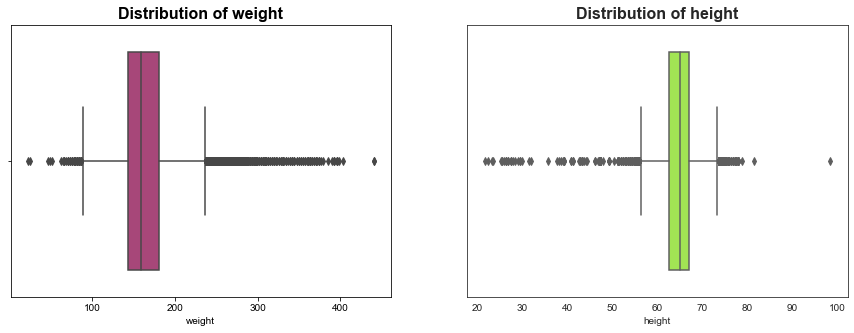

In [16]:
#displaying outliers
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.set_style('white')
sns.boxplot(data.weight,palette='magma')
plt.title('Distribution of weight', fontsize=16, weight='heavy')

plt.subplot(1,2,2)
sns.set_style('white')
sns.boxplot(data.height,palette='turbo')
plt.title('Distribution of height', fontsize=16, weight='heavy')


plt.show()

**Outliers:**
* Min weight is 22 lbs
* Min height is 21 inches 
* Max height is 98 inches (~8 foot) 

**Dealing with outliers using winsorization**

In [17]:
data['weight']=winsorize(data['weight'], (0.01, 0))

data['height']=winsorize(data['height'], (0.02, 0.01))


#Checking for min and max values of weight and height
weight_max= data["weight"]
weight_max_value = weight_max.max() 
print(f'Max value for weight is: {weight_max_value}')

weight_min= data["weight"]
weight_min_value = weight_min.min() 
print(f'Min value for weight is: {weight_min_value}')

print()

height_max= data["height"]
height_max_value = height_max.max() 
print(f'Max value for height is: {height_max_value}')

height_min= data["height"]
height_min_value = height_min.min() 
print(f'Min value for height is: {height_min_value}')

Max value for weight is: 440.924
Min value for weight is: 105.82175999999998

Max value for height is: 72.440984
Min value for height is: 58.661449000000005


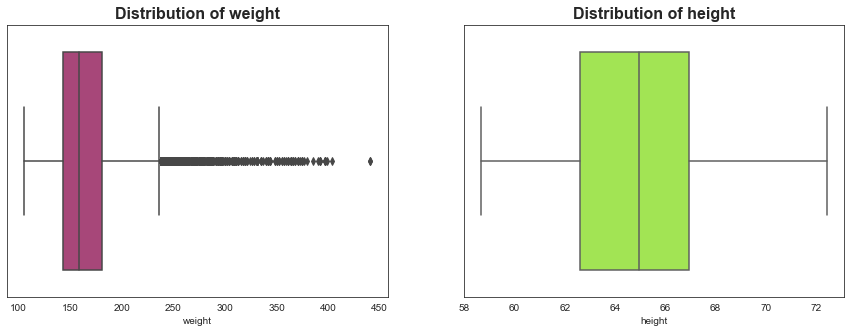

In [18]:
#displaying outliers
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.set_style('white')
sns.boxplot(data.weight,palette='magma')
plt.title('Distribution of weight', fontsize=16, weight='heavy')

plt.subplot(1,2,2)
sns.set_style('white')
sns.boxplot(data.height,palette='turbo')
plt.title('Distribution of height', fontsize=16, weight='heavy')


plt.show()

# Feature Engineering

<h3><font color='blue'>Body Mass Index (BMI)</font></h3>

<img src='https://www.researchgate.net/profile/Elodie_Bertrand2/publication/280629177/figure/tbl1/AS:669166482780168@1536553130573/Weight-ranges-according-to-body-mass-index-BMI.png' style='width:500px; height:200px'/>

<p><font color='red'>This index indicates whether an individual's weight is relatively high or low, based on height.<br> This index defines an ideal range between 18.5 and 24.9.</font></p>





<h3><font color='blue'>Body Mass Index calculation:</font></h3>
$$ bmi = \frac{weight * 703}{height^2} $$

* weight in lbs 
    * 1 kg = 2.20462
* height in inches 
    * 1 cm = 0.393701 inches 

In [19]:
#categorizing the bmi values based on the BMI chart above. 

def weight_status(bmi):
    
    if bmi <= 18.4:
        bmi_result = 'Underweight'
        
    elif bmi == 18.5 or bmi <= 24.9:
        bmi_result = 'Healthy weight'
        
    elif bmi == 25.0 or bmi <= 29.9:
        bmi_result='Overweight'
    
    elif bmi == 30.0 or bmi <= 34.9:
        bmi_result='Obesity I'
    
    elif bmi == 35.0 or bmi <=39.9:
        bmi_result='Obesity II'
        
    else:
        bmi_result = 'Obesity III'
    return bmi_result



#weight_status(30)

In [20]:
#creating a new column for bmi for each of the variables listed below:
data=data.assign(bmi=(703 * data.weight)/(data.height**2))

#creating a new column called bmi_interpretation 
#applying defined function for categorizing weight status using bmi values from the bmi column 
data['bmi_interpretation']=data['bmi'].apply(weight_status)

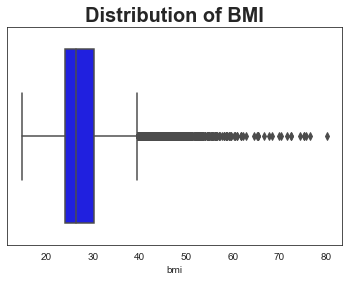

In [21]:
sns.boxplot(data.bmi,color='Blue')
plt.title('Distribution of BMI',fontsize=20, weight='heavy');

In [22]:
bmi_max= data["bmi"]
bmi_max_value = bmi_max.max() 
print(f'Max value for bmi is: {bmi_max_value}')

bmi_min= data["bmi"]
bmi_min_value = bmi_min.min() 
print(f'Min value for bmi is: {bmi_min_value}')

Max value for bmi is: 80.16845198552416
Min value for bmi is: 14.766935926669447


In [23]:
data.shape

(70000, 16)

Setting max limit on BMI to 54 and min limit to 19
<br>[BMI Index](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf)

In [24]:
data=data[data.bmi <= 54]
data=data[data.bmi>=19]
data.shape

(69264, 16)

Max value for BMI is: 53.97377419127892
Min value for BMI is: 19.00198449916885


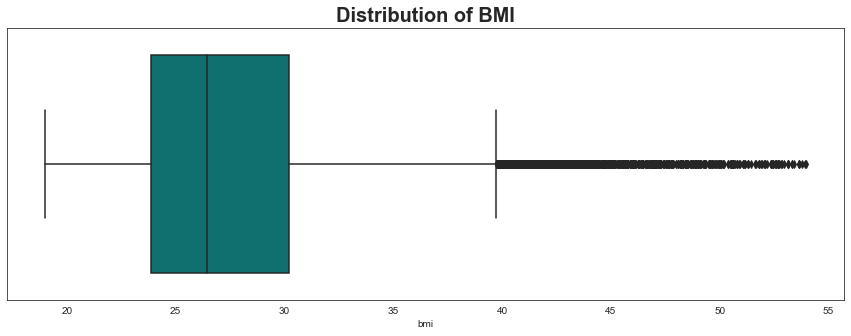

In [25]:
bmi_max= data["bmi"]
bmi_max_value = bmi_max.max() 
print(f'Max value for BMI is: {bmi_max_value}')

bmi_min= data["bmi"]
bmi_min_value = bmi_min.min() 
print(f'Min value for BMI is: {bmi_min_value}')


plt.figure(figsize=(15,5))
sns.boxplot(data.bmi,color='teal')
plt.title('Distribution of BMI',fontsize=20, weight='heavy')
plt.show()

In [26]:
# converting bmi from float to integet 
data['bmi'] = data['bmi'].astype(int)
  
# displaying the datatypes 
display(data.dtypes) 

id                      int64
age                   float64
gender                  int64
height                float64
weight                float64
systolic                int64
diastolic               int64
cholesterol             int64
gluc                    int64
smoke                   int64
alco                    int64
active                  int64
cvd_result              int64
bp_stage               object
bmi                     int64
bmi_interpretation     object
dtype: object

In [27]:
negative_cvd['bmi']=data['bmi'].apply(weight_status)
positive_cvd['bmi']=data['bmi'].apply(weight_status)

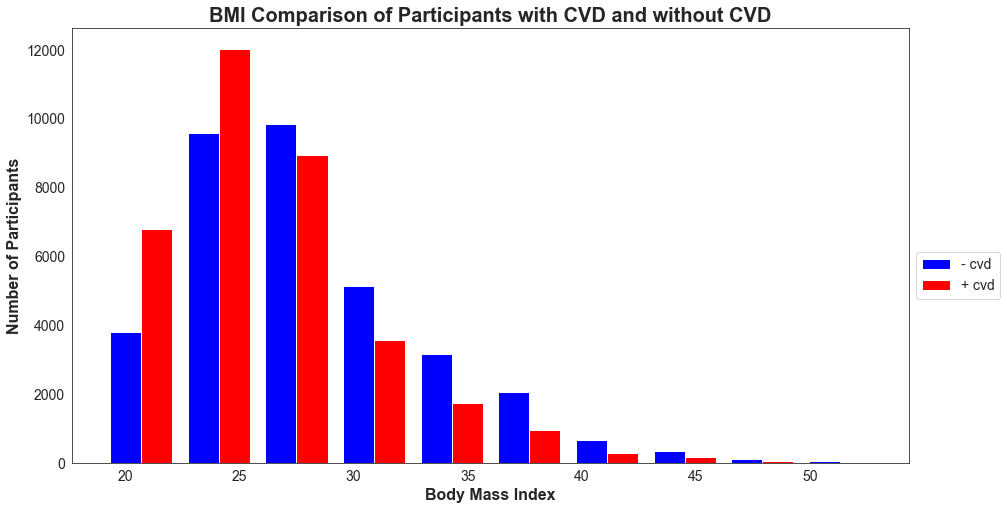

In [28]:
#comparing bmi for cvd+ and cvd-


negative = data[data.cvd_result != 1]
positive = data[data.cvd_result == 1]

negative_=positive.bmi
positive_=negative.bmi


#plotting histogram and naming legend label and color for each samples
plt.figure(figsize=(15,8))
plt.hist([negative_, positive_], label=['- cvd', '+ cvd'], color=['blue', 'red'])

#location of legend 
plt.gca().legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=14)


#creating title 
plt.title('BMI Comparison of Participants with CVD and without CVD', 
          weight='bold', fontsize=20)


#formatting x and y labels 
plt.xlabel('Body Mass Index', weight='bold', fontsize=16)
plt.ylabel('Number of Participants', weight='bold', fontsize=16)

# format the x and y ticks
plt.xticks(rotation=0, horizontalalignment='center', weight='normal', fontsize=14)

plt.yticks(weight='normal', fontsize=14)
plt.show()

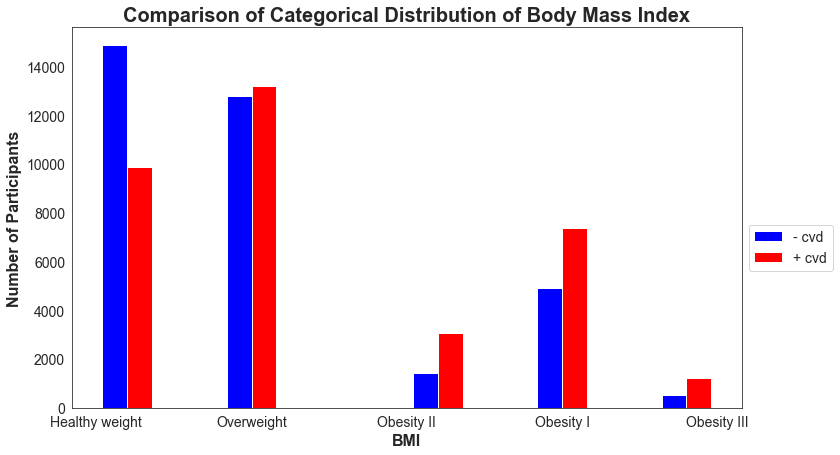

In [29]:
plt.figure(figsize=(12,7))


neg_=negative['bmi_interpretation']
pos_=positive['bmi_interpretation']


#plotting histogram and naming legend label and color for each samples
plt.hist([neg_, pos_], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.gca().legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=14)


#creating title 
plt.title('Comparison of Categorical Distribution of Body Mass Index', 
          weight='bold', fontsize=20)


#formatting x and y labels 
plt.xlabel('BMI', weight='bold', fontsize=16)
plt.ylabel('Number of Participants', weight='bold', fontsize=16)


# format the x and y ticks
plt.xticks(rotation=0, horizontalalignment='center', 
           weight='normal', fontsize=14)

plt.yticks(weight='normal', fontsize=14)


plt.show()

Based on categorical BMI analysis shown above, there are more participants without CVD that are in the lower BMI category than participants with CVD, which is different from the distribution of numerical BMI value on the previous graph.

Next, graphing glucose and cholesterol examinations and alcohol, physical activity categories to analyze each groups' clinical examinations and lifestyle activities.

**Glucose Examination Feature:**
* 1: normal (healthy range) 
* 2: above normal (unhealthy range) 
* 3: well above normal (unhealthy range) 

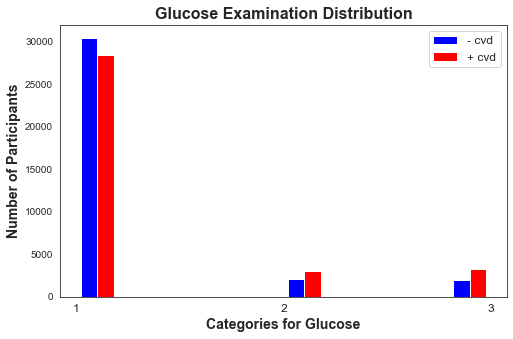

In [30]:
n_gluc=negative['gluc']
p_gluc=positive['gluc']


#plotting histogram and naming legend label and color for each samples
plt.figure(figsize=(8,5))
plt.hist([n_gluc, p_gluc], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.legend(loc="upper right", fontsize=12)


#creating title 
plt.title('Glucose Examination Distribution', 
          weight='bold', fontsize=16)


#formatting x and y labels 
plt.xlabel('Categories for Glucose', weight='bold', fontsize=14)
plt.ylabel('Number of Participants', weight='bold', fontsize=14)
plt.xticks(np.arange(1, 4, step=1), horizontalalignment='center', 
           weight='normal', fontsize=12)

plt.show()

**Although both groups are in the "healthy" glucose category (1), there are more participants without CVD in this group and more participants with CVD in the unhealthy glucose categories.**

**Cholesterol Values:**
* 1: normal
* 2: above normal (unhealthy)
* 3: well above normal (very unhealthy)

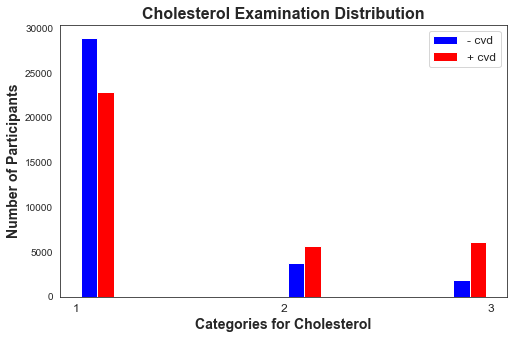

In [31]:
n_chol=negative['cholesterol']
p_chol=positive['cholesterol']


#plotting histogram and naming legend label and color for each samples
plt.figure(figsize=(8,5))
plt.hist([n_chol, p_chol], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.legend(loc="upper right", fontsize=12)


#creating title 
plt.title('Cholesterol Examination Distribution', 
          weight='bold', fontsize=16)


#formatting x and y labels 
plt.xlabel('Categories for Cholesterol', weight='bold', fontsize=14)
plt.ylabel('Number of Participants', weight='bold', fontsize=14)
plt.xticks(np.arange(1, 4, step=1), horizontalalignment='center', 
           weight='normal', fontsize=12)

plt.show()

**There are more participants without CVD in the healthy category (1) than in the unhealthy categories (2,3) for cholesterol.**

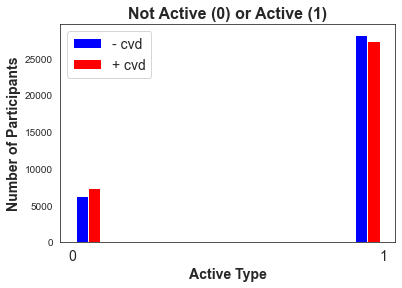

In [32]:
n_active=negative['active']
p_active=positive['active']


#plotting histogram and naming legend label and color for each samples
plt.hist([n_active, p_active], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.legend(loc="upper left", fontsize=14)


#creating title 
plt.title('Not Active (0) or Active (1)', 
          weight='bold', fontsize=16)


#formatting x and y labels 
plt.xlabel('Active Type', weight='bold', fontsize=14)
plt.ylabel('Number of Participants', weight='bold', fontsize=14)
plt.xticks(np.arange(0, 2, step=1), horizontalalignment='center', 
           weight='normal', fontsize=14)



plt.show()

**There are slightly more participants with CVD that are not physically active (0) than physically active. More Participants without CVD are engaged in physical activity.**

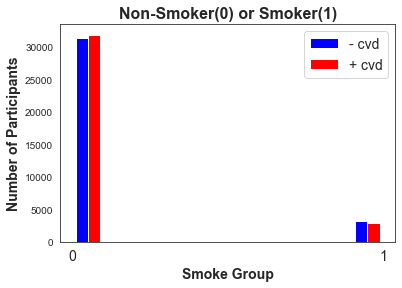

In [33]:
n_smoke=negative['smoke']
p_smoke=positive['smoke']


#plotting histogram and naming legend label and color for each samples
plt.hist([n_smoke, p_smoke], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.legend(loc="upper right", fontsize=14)


#creating title 
plt.title('Non-Smoker(0) or Smoker(1)', 
          weight='bold', fontsize=16)


#formatting x and y labels 
plt.xlabel('Smoke Group', weight='bold', fontsize=14)
plt.ylabel('Number of Participants', weight='bold', fontsize=14)
plt.xticks(np.arange(0, 2, step=1), horizontalalignment='center', 
           weight='normal', fontsize=14)



plt.show()

**Both group have almost all of their participants in the non-smoker category indicated by 0. There is slightly more non-smokers with CVD than than non-smokers without CVD. More smokers are in the Negative CVD group. Since both groups in this dataset closely resemble each other, alcohol consumption is not a good determinant for predicting +CVD or -CVD.**

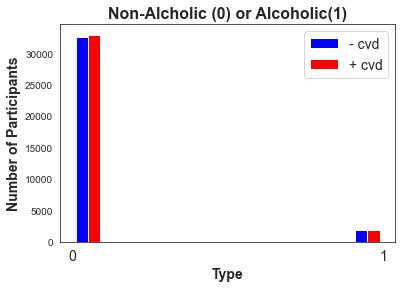

Negative CVD and Alcohol consumption:
alco            0     1
cvd_result             
0           32614  1903

Positive CVD and Alcohol consumption:
alco            0     1
cvd_result             
1           32935  1812


In [34]:
n_alco=negative['alco']
p_alco=positive['alco']


#plotting histogram and naming legend label and color for each samples
plt.hist([n_alco, p_alco], label=['- cvd', '+ cvd'], color=['blue', 'red'])


#location of legend 
plt.legend(loc="upper right", fontsize=14)


#creating title 
plt.title('Non-Alcholic (0) or Alcoholic(1)', 
          weight='bold', fontsize=16)


#formatting x and y labels 
plt.xlabel('Type', weight='bold', fontsize=14)
plt.ylabel('Number of Participants', weight='bold', fontsize=14)
plt.xticks(np.arange(0, 2, step=1), horizontalalignment='center', 
           weight='normal', fontsize=14)



plt.show()


#using crosstab to show weight status values using the binary in cvd_result column
neg_alco=pd.crosstab(negative.cvd_result, negative.alco)
print(f'Negative CVD and Alcohol consumption:\n{neg_alco}\n')



pos_alco=pd.crosstab(positive.cvd_result, positive.alco)
print(f'Positive CVD and Alcohol consumption:\n{pos_alco}')

**There are approximately 200 more people with CVD that do not drink alcohol and about 100 less people with CVD that do drink alcohol compared to people without CVD. Since both groups in this dataset closely resemble each other, alcohol consumption is not a good determinant for predicting +CVD or -CVD.**


**Using a correlation matrix to summarize the features' relationship with cvd_result(target)**

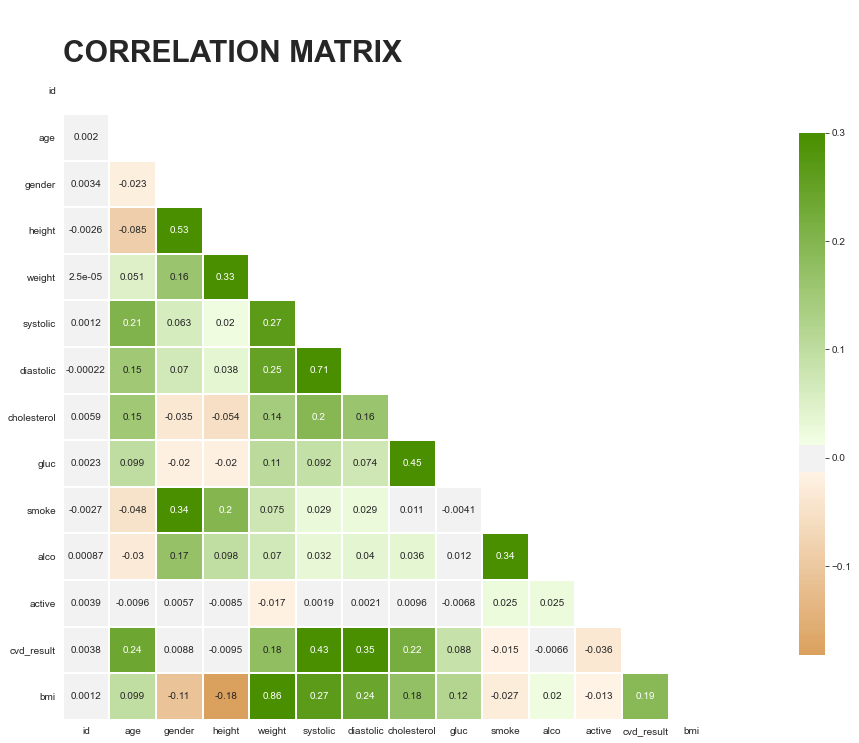

In [35]:
#correlation matrix 
corr = data.corr()
cmap = sns.diverging_palette(60, 100, 450, as_cmap=True)


# Generate a mask for the upper triangle so no repetition 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=1.0, cbar_kws={"shrink": 0.8});

# title
title = '\nCORRELATION MATRIX'
plt.title(title, loc='left', fontsize=30, weight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.show()

In [36]:
#determining the relationship that target has with the feature variables 
corr=np.abs(data.iloc[:,1:].corr().loc[:,
                                       "cvd_result"]).sort_values(
    ascending=False)


corr

cvd_result     1.000000
systolic       0.428951
diastolic      0.346089
age            0.236497
cholesterol    0.220456
bmi            0.190027
weight         0.179139
gluc           0.088377
active         0.035582
smoke          0.014518
height         0.009481
gender         0.008777
alco           0.006622
Name: cvd_result, dtype: float64

**From the correlation analysis, Blood pressure (systolic and diastolic) has the most impact on cvd_result.**

In [37]:
from sklearn.model_selection import train_test_split

#setting the feature set to variable X
X=data.drop(['cvd_result', 'bp_stage', 'bmi_interpretation', 'id', 'gender', 
               'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'height', 'weight'], axis=1)

#isolating the target variables to variable y
y=data['cvd_result']


#splitting train and test 
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=24)

print(X.shape)
print(len(y))

(69264, 4)
69264


In [38]:
#importing estimators 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


lgbm=LGBMClassifier(n_estimators=100, random_state=24)
lr=LogisticRegression(max_iter=1000, random_state=24)
nb = GaussianNB()
nn=MLPClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=24)


models = {"Light GBM" : lgbm,
          "Logistic Regression" : lr,
          "Naive Bayes" : nb,
          "Neural Network": nn,
          "Random Forest" : rf
         }
                            
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

/Users/nikee/opt/anaconda3/envs/snikee24/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


In [39]:
scores_df = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_df.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_df

,Accuracy Score
Light GBM,0.723598
Logistic Regression,0.719844
Naive Bayes,0.708150
Random Forest,0.695806
Neural Network,0.622392


**The Best estimator is LightGBM**


**Future Directions:**
* Apply GridSearch to find best parameters for each estimator, which may improve accuracy score.